Midterm - Part 2:<br>
For this portion of the midterm, you have been provided a business case and data set to solve. You are required to complete the business case, and answer all questions provided. You may answer your questions in a Jupyter Notebook, by using Markdown cells. Your final notebook should include all Python code that you used for analysis and all answers to the provided questions. Once you're finished, you can upload your Python notebook as your submission.<br>
<br>
Business Case:<br>
You're currently an analyst working at an e-commerce company which sells beauty and fashion products. The websites receives a lot of traffic (i.e., many customers are visiting), and most visitors put items in their cart. However, less than 30% users actually check out after they have added items to their cart.<br>
<br>
You'd like to understand why that might be the case, and to make some recommendations to the Product team on which user groups are not performing well so they can take appropriate action. You have the following data set to work with:<br>

'userID': unique user identifier <br>
'age': age<br>
'sessions': session identifier for each user<br>
'time_spent': minutes spent browsing the website<br>
'pages_visited': count of pages visited on the website<br>
'cart_items': number of items in the user's cart<br>
'cart_value': total $ value of the cart<br>
'checkout_status': 1 or 0 indicating wether the user checked out or not (1=Yes, 0=No)<br>
'device': the type of device the user is using (Desktop, Mobile or Tablet)<br>
'location': the user's location<br>

Conduct analysis on the provided data to identify the characteristics of users who check out, and those who don't. 

1) Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?
2) How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.
3) What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how).

Once you're finished, submit your completed notebook with answers to the above questions included in Markdown cells. Your code should be legible, easy to follow, and your answers to the questions should be clear and precise.

-------------------------------------------------------------------

**submitted by Sreekanth Potlabathini(220088993)**

# Midterm: Recommendation and improvement for check-out after they have added items to their cart

-------------------------------------------------------------------

**Content** 

step 1: Importing libraries & data set 

step 2: Working with the data

step 3: Understand outliers and see if they can be removed

step 4: Removing duplicates & non-useful data 

step 5: Complete the data- fill missing values

step 6: Questions & Answers + Data Analysis results

-------------------------------------------------------------------

In [10]:
# Importing the required libraries for handling dataframes & graphs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Importing the dataset 'sales.csv file for the analysis
df = pd.read_csv(r"C:\Users\srika\OneDrive\Documents\York\Sem-1 york\MBAN 6110 - Data Science 1\midterm_data.csv",index_col='userID')
df.describe(include='all')

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [18]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4867 entries, 1 to 5000
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4867 non-null   int64  
 1   sessions         4867 non-null   int64  
 2   time_spent       4867 non-null   float64
 3   pages_visited    4867 non-null   int64  
 4   cart_items       4867 non-null   int64  
 5   cart_value       4867 non-null   float64
 6   checkout_status  4867 non-null   int64  
 7   device           4867 non-null   object 
 8   location         4867 non-null   object 
dtypes: float64(2), int64(5), object(2)
memory usage: 380.2+ KB


observation 1:  there are missing values in 5000 entries i.e., location(100) & devices(30) together can max at 130 rows. <br>
130/5000 = 2.6% hence all the missing values can be droped. <br>
<br>

observation 2: mean Vs Median <br>
age : 41.538200 vs 42.000000 :very close (Left-skewed) <br>
sessions: 5.027200 vs5.000000 : :very close (right-skewed) <br>
time_spent: 25.158496 vs 25.035361:very close (right-skewed) <br>
pages_visited: 5.774400 vs 6.000000 :very close (Left-skewed) <br>
cart_items: 14.966400 vs 15.000000 :very close (Left-skewed) <br>
cart_value: 149.443146 vs 143.440000 : need to analyse (Left-skewed) <br>
<br>

In [11]:
df.dropna(subset=['location'], inplace=True) # listwise deletion
df.dropna(subset=['device'], inplace=True) # listwise deletion
df.drop_duplicates(inplace=True)
df.shape

(4871, 9)

In [12]:
5000-4871

129

In [13]:
129/50

2.58

total : 2.58% dropped which is lessthan 10%

<Axes: ylabel='time_spent'>

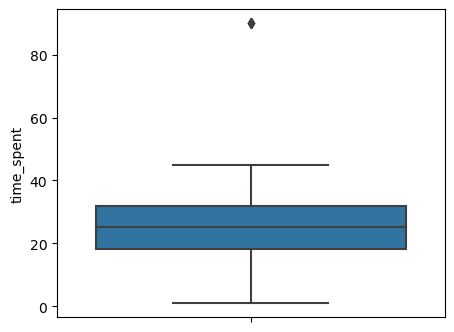

In [14]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(data=df,y='time_spent',ax=ax)

we can drop the outlier 

In [15]:
df.drop(df[df['time_spent']>60].index,axis=0,inplace=True)

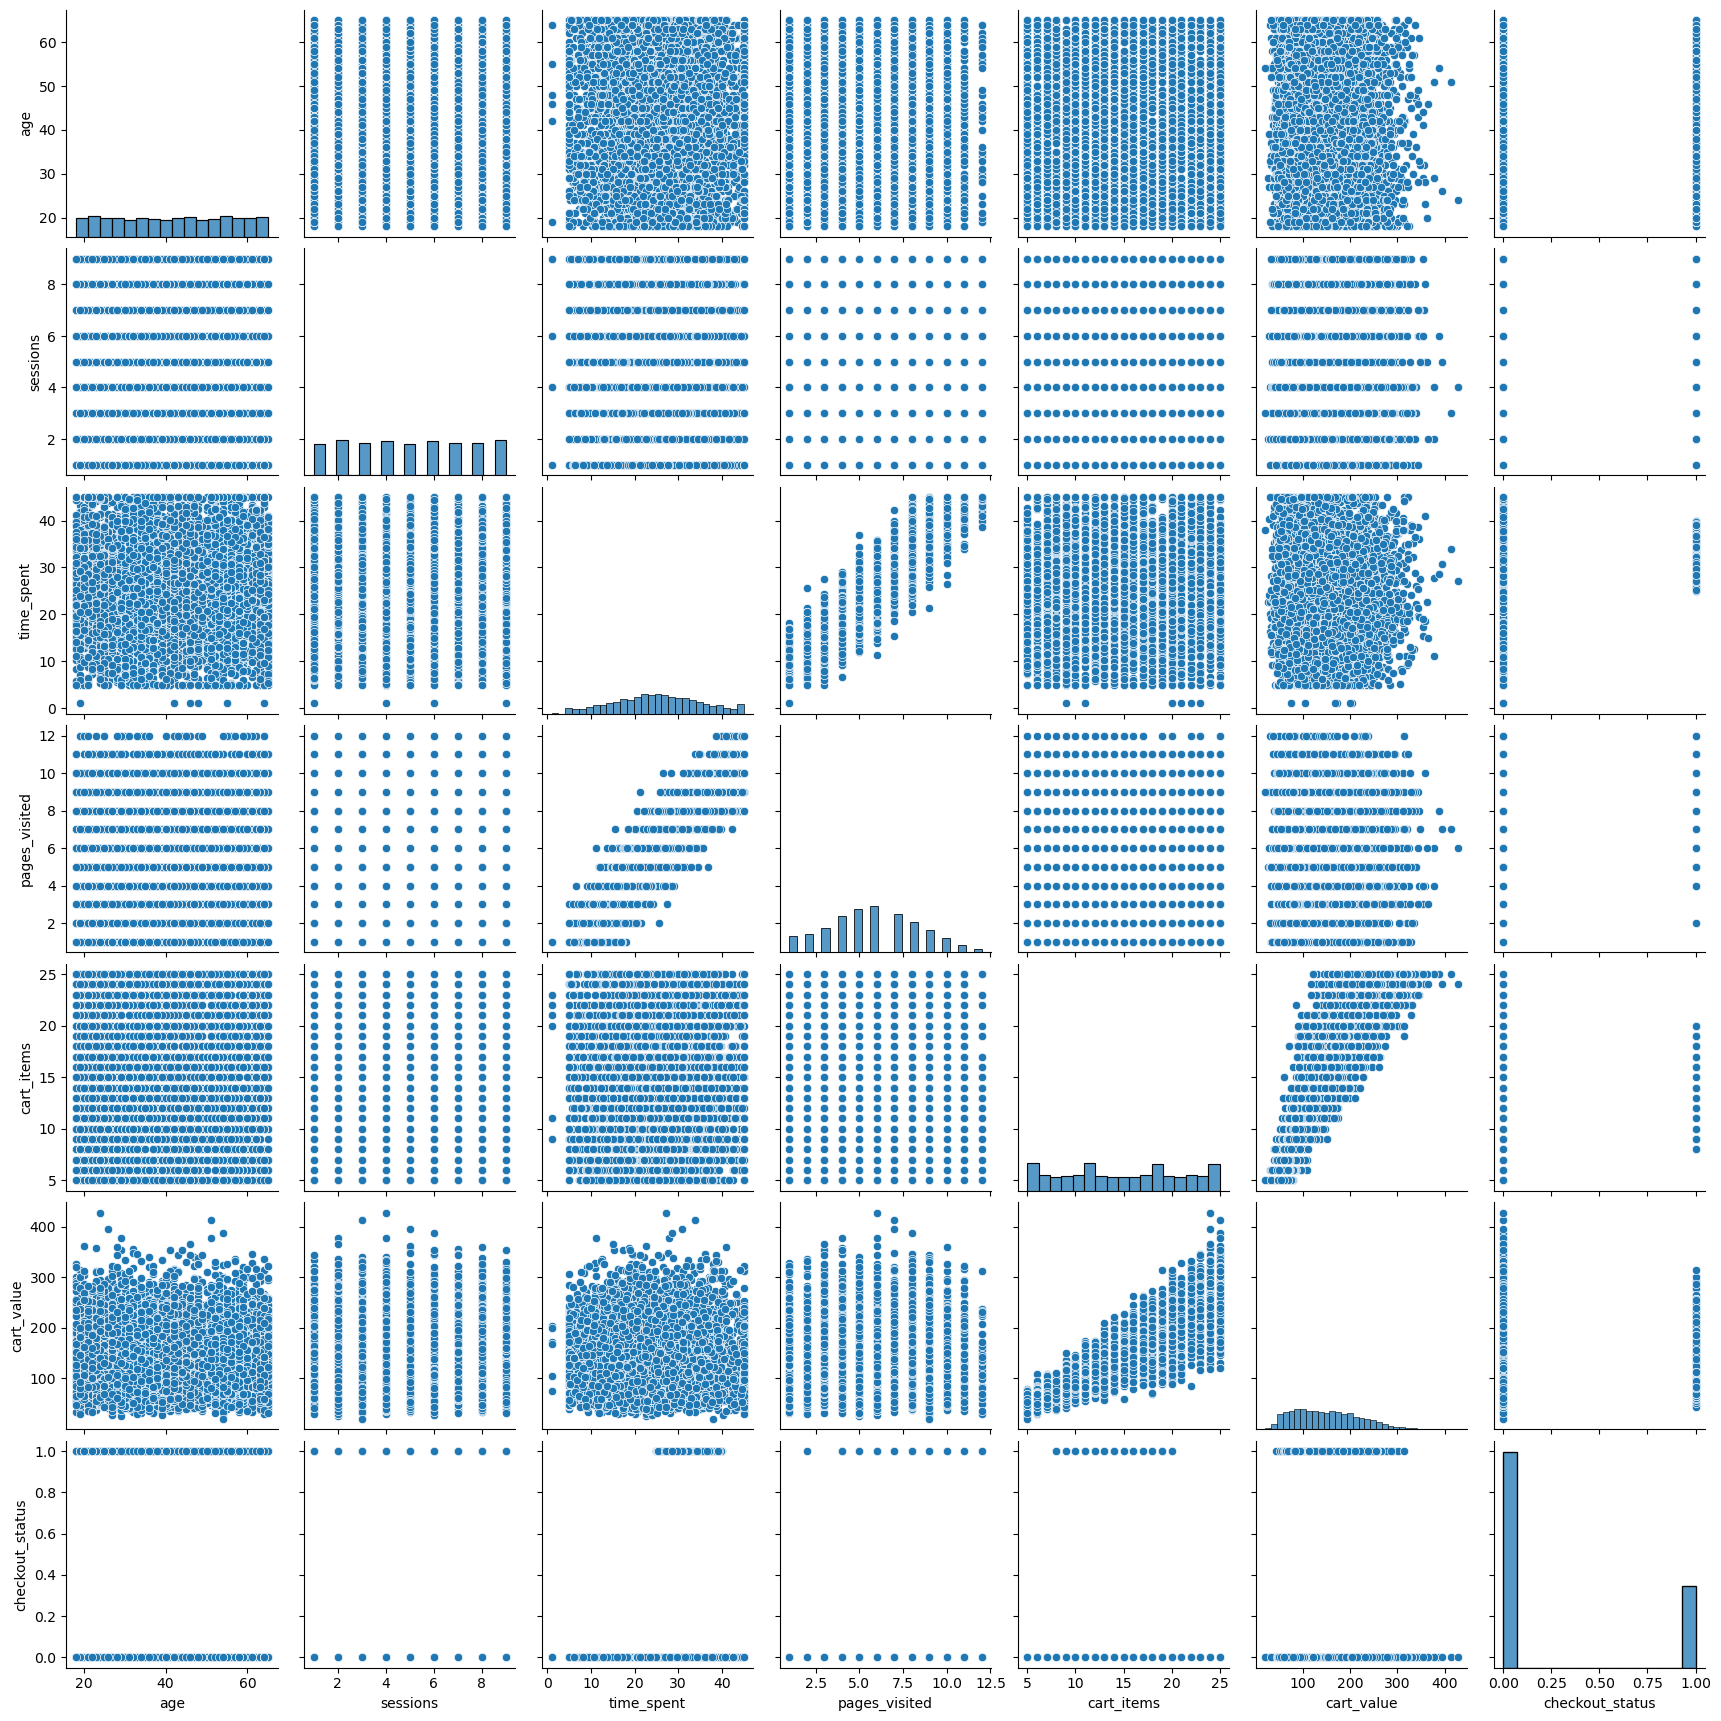

In [16]:
sns.pairplot(df)

C:\Users\srika\AppData\Local\Temp\ipykernel_12708\3802193993.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

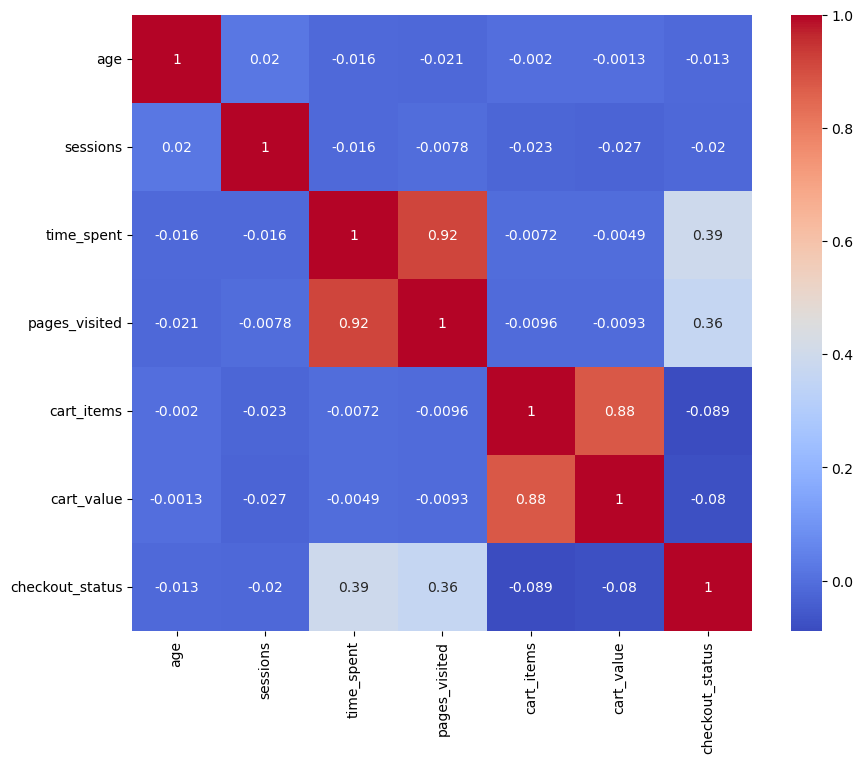

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [28]:
df1 = df[df['checkout_status'] == 1]
df2 = df[df['checkout_status'] == 0]



In [25]:

df['Revenue'] = df['cart_items']*df['cart_value']

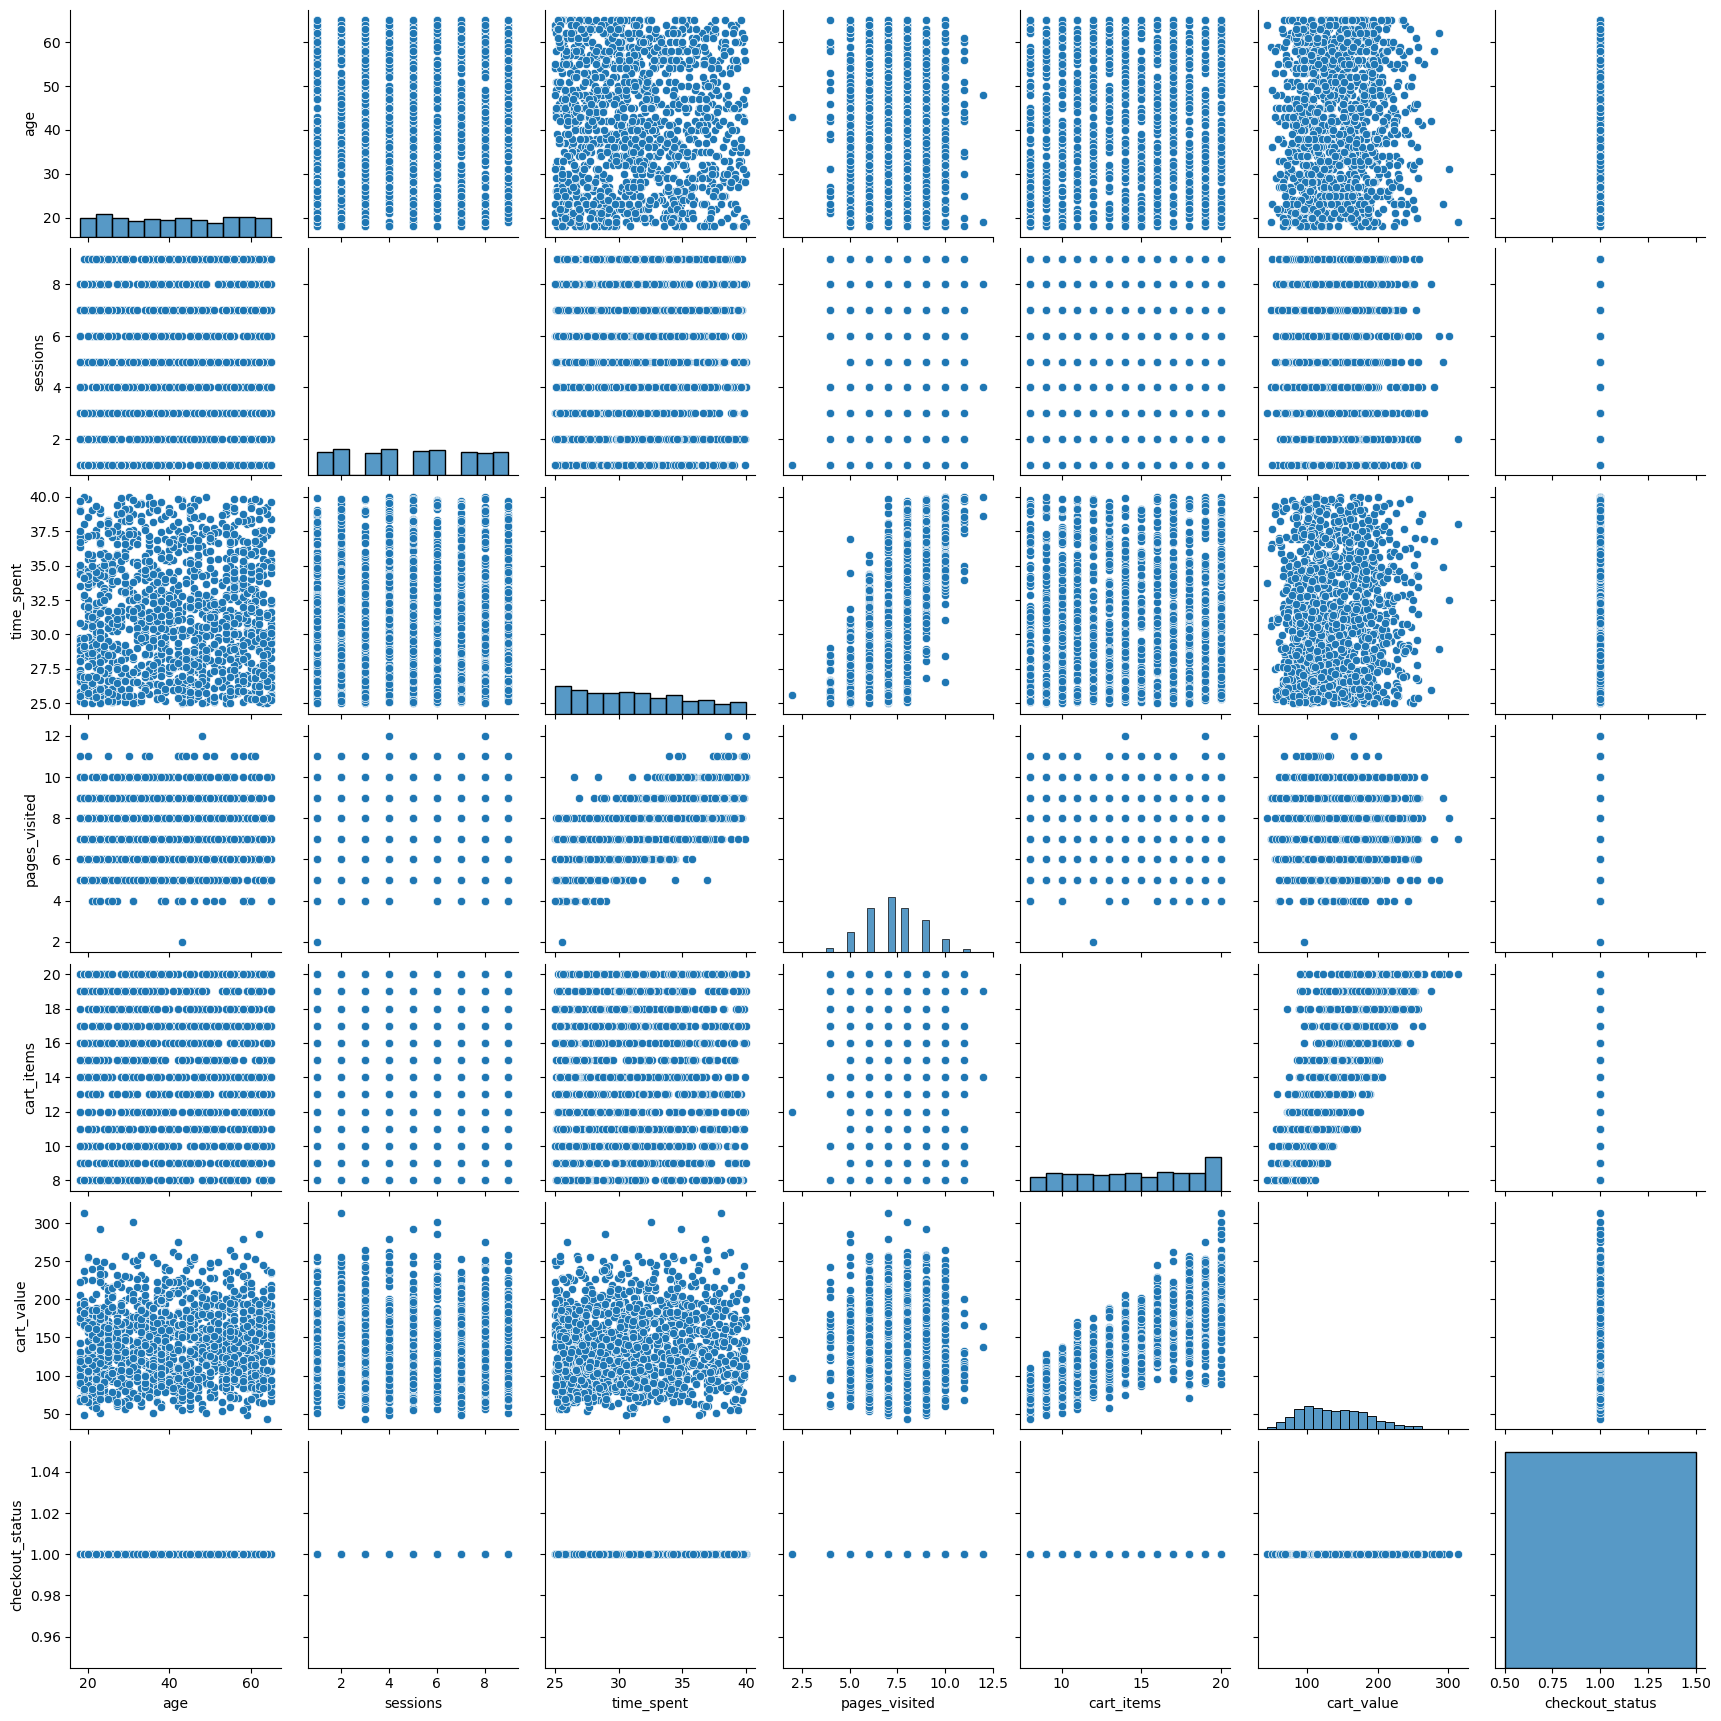

In [27]:
sns.pairplot(df1)

In [30]:
df1.describe(include='all')

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,Revenue
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.0,1332,1332,1332.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720,291,NaN
mean,41.234985,4.939940,31.318157,7.289790,14.096847,140.510871,1.0,NaN,NaN,2119.926629
std,14.227291,2.560932,4.178320,1.507841,3.735881,47.683980,0.0,NaN,NaN,1157.067577
min,18.000000,1.000000,25.000659,2.000000,8.000000,43.220000,1.0,NaN,NaN,345.760000
25%,28.000000,3.000000,27.606351,6.000000,11.000000,102.810000,1.0,NaN,NaN,1112.722500
50%,41.000000,5.000000,30.943031,7.000000,14.000000,135.830000,1.0,NaN,NaN,1907.475000
75%,54.000000,7.000000,34.539573,8.000000,17.000000,174.365000,1.0,NaN,NaN,2935.360000


In [31]:
df2.describe(include='all')

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,Revenue
count,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3535.0,3535,3535,3535.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1798,735,NaN
mean,41.657143,5.056294,22.782803,5.200566,15.300990,152.825926,0.0,NaN,NaN,2785.239100
std,13.974656,2.599998,10.082582,2.641941,6.696293,74.995616,0.0,NaN,NaN,2153.949651
min,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.0,NaN,NaN,102.050000
25%,29.000000,3.000000,16.013852,3.000000,9.000000,85.600000,0.0,NaN,NaN,760.835000
50%,42.000000,5.000000,21.637069,5.000000,15.000000,147.030000,0.0,NaN,NaN,2306.780000
75%,54.000000,7.000000,28.401260,7.000000,22.000000,209.740000,0.0,NaN,NaN,4508.090000


we are missing on 2785.23(mean) * 3535(count) = 9845788.05 $ of revenue 

C:\Users\srika\AppData\Local\Temp\ipykernel_12708\2146006042.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


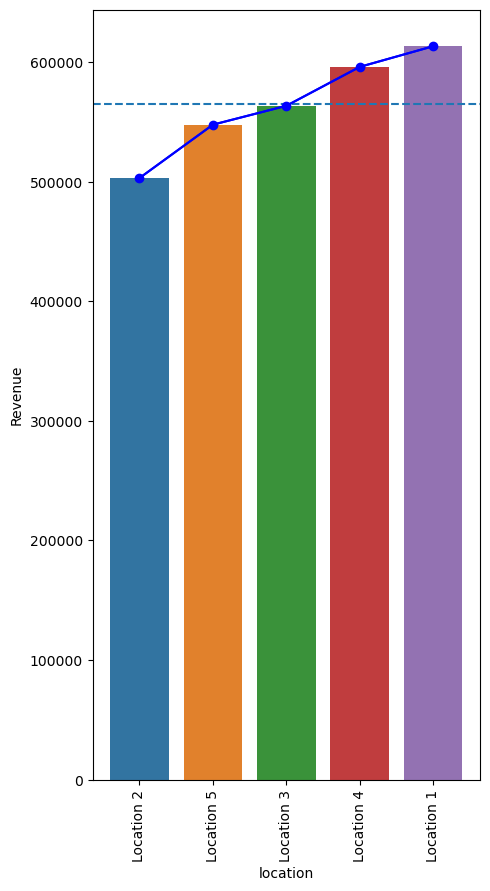

In [37]:
dfl = df1.groupby('location')['Revenue'].sum().reset_index()
dfl.sort_values('Revenue', axis=0, ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=(5, 10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(data=dfl, x='location', y='Revenue')
plt.axhline(y=dfl['Revenue'].mean(), linestyle='--', label='Mean Revenue Volume')
plt.plot(range(len(dfl)), dfl['Revenue'], marker='o', linestyle='-', color='b', label='Revenue Trend')
plt.plot(range(len(dfl)), dfl['Revenue'], color='b')

C:\Users\srika\AppData\Local\Temp\ipykernel_12708\245947165.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


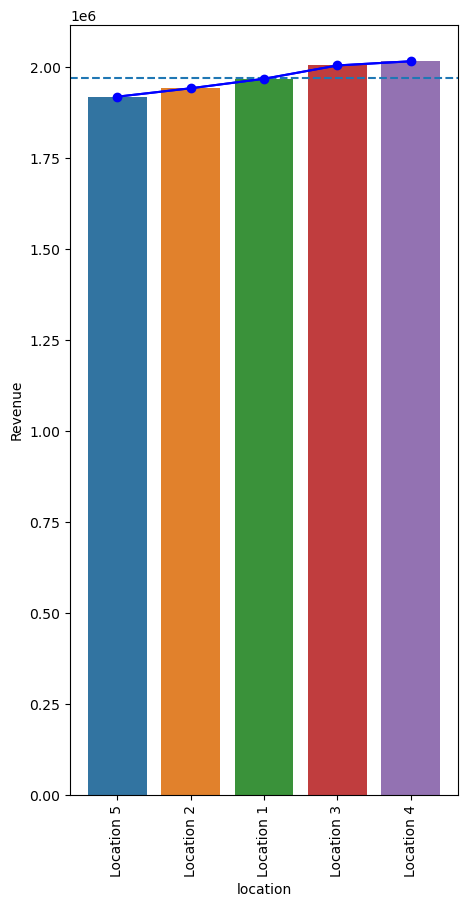

In [38]:
dfl = df2.groupby('location')['Revenue'].sum().reset_index()
dfl.sort_values('Revenue', axis=0, ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=(5, 10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(data=dfl, x='location', y='Revenue')
plt.axhline(y=dfl['Revenue'].mean(), linestyle='--', label='Mean Revenue Volume')
plt.plot(range(len(dfl)), dfl['Revenue'], marker='o', linestyle='-', color='b', label='Revenue Trend')
plt.plot(range(len(dfl)), dfl['Revenue'], color='b')

C:\Users\srika\AppData\Local\Temp\ipykernel_12708\3245166736.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


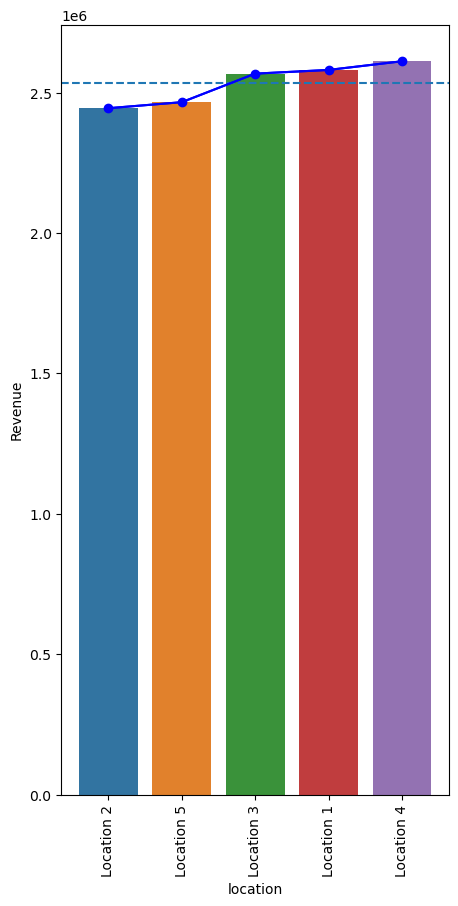

In [39]:
dfl = df.groupby('location')['Revenue'].sum().reset_index()
dfl.sort_values('Revenue', axis=0, ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=(5, 10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(data=dfl, x='location', y='Revenue')
plt.axhline(y=dfl['Revenue'].mean(), linestyle='--', label='Mean Revenue Volume')
plt.plot(range(len(dfl)), dfl['Revenue'], marker='o', linestyle='-', color='b', label='Revenue Trend')
plt.plot(range(len(dfl)), dfl['Revenue'], color='b')

location 2 & 5 are performing needs to be improved no matter it getherates revenue or not.

C:\Users\srika\AppData\Local\Temp\ipykernel_12708\2132697061.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


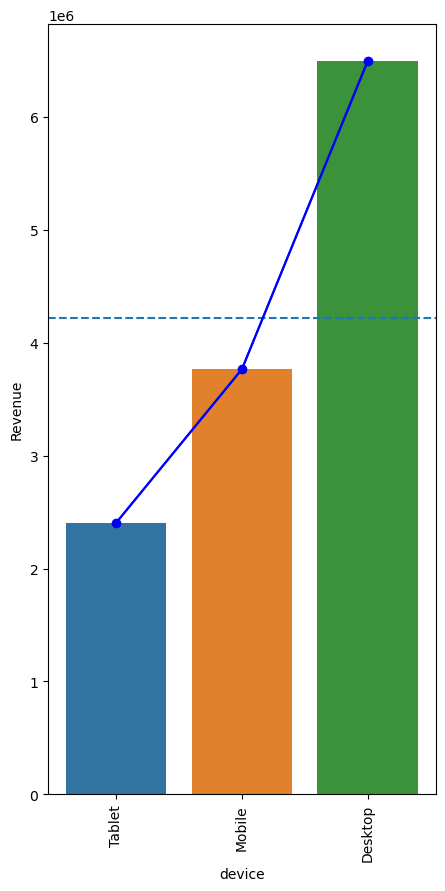

In [40]:
dfd = df.groupby('device')['Revenue'].sum().reset_index()
dfd.sort_values('Revenue', axis=0, ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=(5, 10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(data=dfd, x='device', y='Revenue')
plt.axhline(y=dfd['Revenue'].mean(), linestyle='--', label='Mean Revenue Volume')
plt.plot(range(len(dfd)), dfd['Revenue'], marker='o', linestyle='-', color='b', label='Revenue Trend')
plt.plot(range(len(dfd)), dfd['Revenue'], color='b')

C:\Users\srika\AppData\Local\Temp\ipykernel_12708\64325628.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


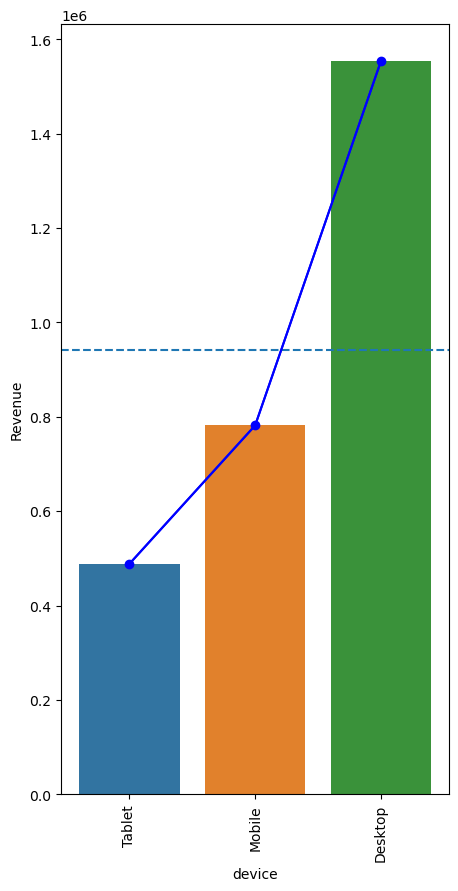

In [41]:
dfd = df1.groupby('device')['Revenue'].sum().reset_index()
dfd.sort_values('Revenue', axis=0, ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=(5, 10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(data=dfd, x='device', y='Revenue')
plt.axhline(y=dfd['Revenue'].mean(), linestyle='--', label='Mean Revenue Volume')
plt.plot(range(len(dfd)), dfd['Revenue'], marker='o', linestyle='-', color='b', label='Revenue Trend')
plt.plot(range(len(dfd)), dfd['Revenue'], color='b')

C:\Users\srika\AppData\Local\Temp\ipykernel_12708\2373954324.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


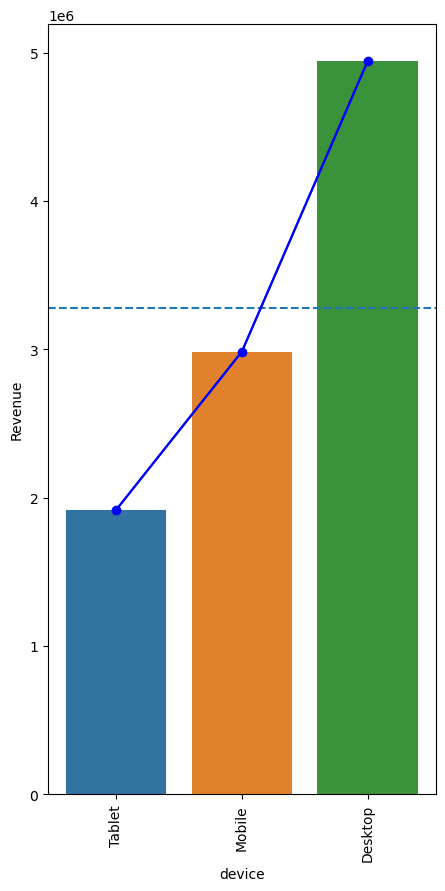

In [42]:
dfd = df2.groupby('device')['Revenue'].sum().reset_index()
dfd.sort_values('Revenue', axis=0, ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=(5, 10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(data=dfd, x='device', y='Revenue')
plt.axhline(y=dfd['Revenue'].mean(), linestyle='--', label='Mean Revenue Volume')
plt.plot(range(len(dfd)), dfd['Revenue'], marker='o', linestyle='-', color='b', label='Revenue Trend')
plt.plot(range(len(dfd)), dfd['Revenue'], color='b')

desktop are the most used device hence we need to focus our effors towars understanding how users interact with features with respect to website design.

In [43]:
df.head(5)

,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,Revenue
userID,,,,,,,,,,
1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1,3984.20
2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3,6191.22
3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4,5540.01
4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2,2940.48
5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4,595.10


<Axes: xlabel='age_group', ylabel='Revenue'>

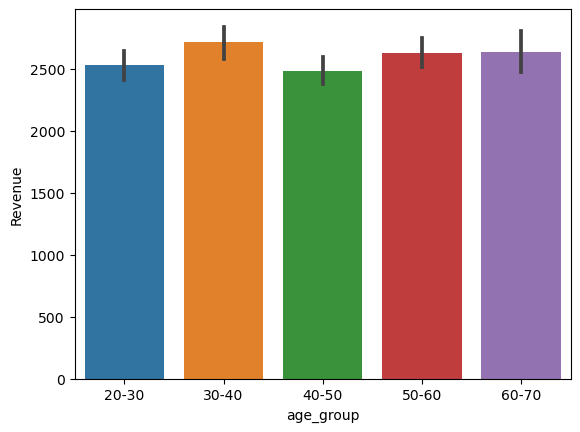

In [55]:
age_min = df['age'].min()
age_max = df['age'].max()

print(f"Age Range: {age_min} - {age_max}")


Age Range: 18 - 65


C:\Users\srika\AppData\Local\Temp\ipykernel_12708\2128887988.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_group'] = pd.cut(df1['age'], bins=bin_edges)


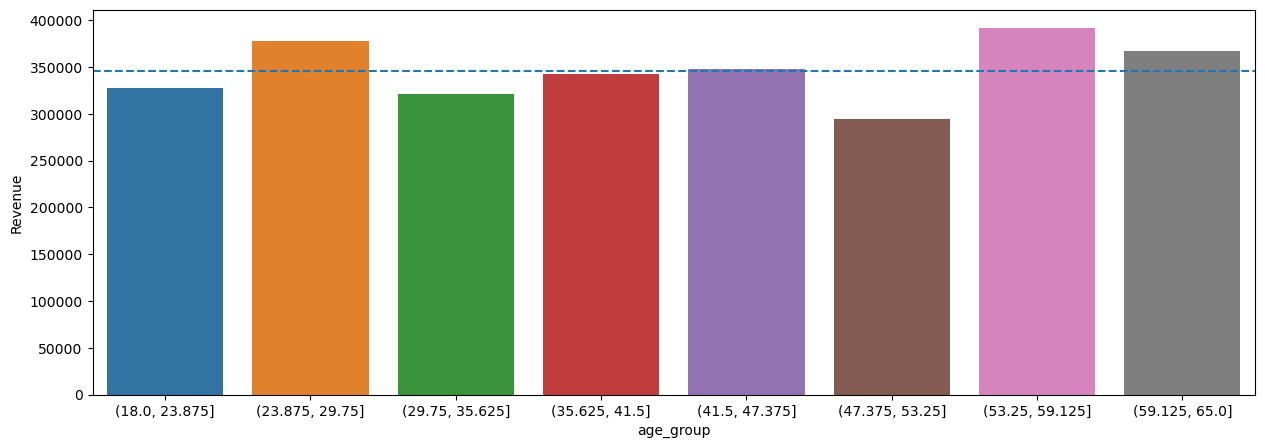

In [67]:


# Define the range and number of bins
age_min = 18
age_max = 65
num_bins = 8

# Calculate the bin width
bin_width = (age_max - age_min) / num_bins

# Generate the bin edges
bin_edges = [age_min + i * bin_width for i in range(num_bins + 1)]

# Categorize the 'age' column into bins
df1['age_group'] = pd.cut(df1['age'], bins=bin_edges)

df1a = df1.groupby('age_group')['Revenue'].sum().reset_index()
df1a.sort_values('Revenue', axis=0, ascending=True, inplace=True)


fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=df1a, x='age_group', y='Revenue')

plt.axhline(y=df1a['Revenue'].mean(), linestyle='--', label='Mean Sales Volume')




we can see thtthat higher amount of revenue is generated from age froups of 23-29 & 53- 59
which are very young or very old. considering this we can split the marketing ideoloy into two persona attracting two diffrent customers.

C:\Users\srika\AppData\Local\Temp\ipykernel_12708\1648380007.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age_group'] = pd.cut(df2['age'], bins=bin_edges)


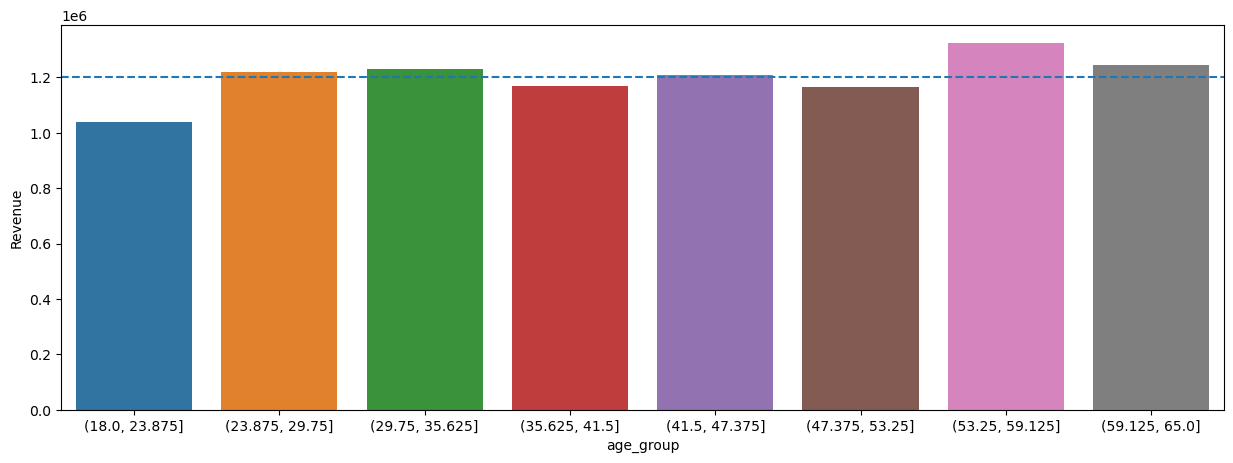

In [68]:

# Define the range and number of bins
age_min = 18
age_max = 65
num_bins = 8

# Calculate the bin width
bin_width = (age_max - age_min) / num_bins

# Generate the bin edges
bin_edges = [age_min + i * bin_width for i in range(num_bins + 1)]

# Categorize the 'age' column into bins
df2['age_group'] = pd.cut(df2['age'], bins=bin_edges)

df2a = df2.groupby('age_group')['Revenue'].sum().reset_index()
df2a.sort_values('Revenue', axis=0, ascending=True, inplace=True)


fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(data=df2a, x='age_group', y='Revenue')

plt.axhline(y=df2a['Revenue'].mean(), linestyle='--', label='Mean Sales Volume')

we have lower revenue conversion rate win the same groups.

it can also mean that these group are most active uses of the product.
but age groups of 29-35 have been visiting but not been converted into revenue that means that they have lost interest towards the product.

hence we need to ook at retention rate here for age groups of 23-29 to make revenue in 29-35

C:\Users\srika\AppData\Local\Temp\ipykernel_12708\2844257242.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


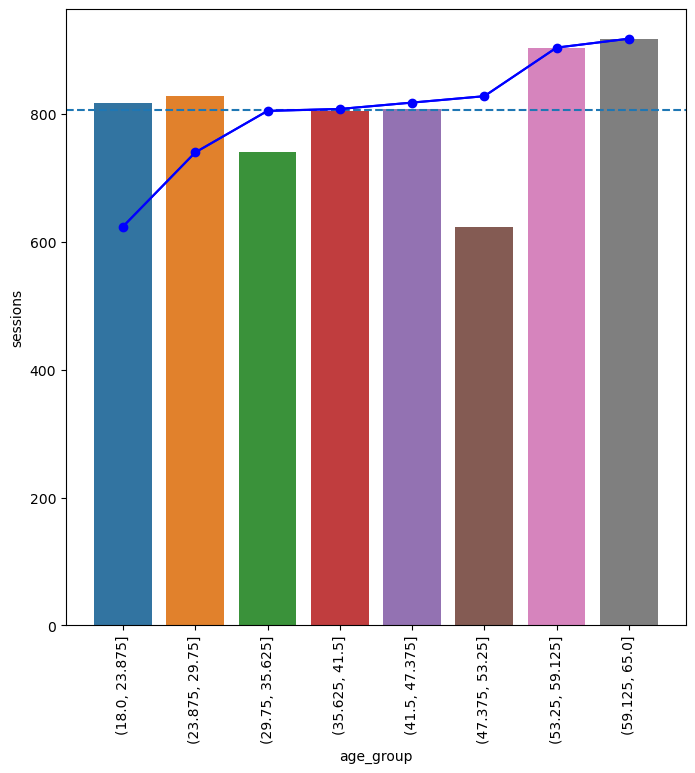

In [70]:
dfh = df1.groupby('age_group')['sessions'].sum().reset_index()
dfh.sort_values('sessions', axis=0, ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(data=dfh, x='age_group', y='sessions')
plt.axhline(y=dfh['sessions'].mean(), linestyle='--', label='Mean sessions Volume')
plt.plot(range(len(dfh)), dfh['sessions'], marker='o', linestyle='-', color='b', label='sessions Trend')
plt.plot(range(len(dfh)), dfh['sessions'], color='b')

older aged have more sessions than the rest

C:\Users\srika\AppData\Local\Temp\ipykernel_12708\656401748.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


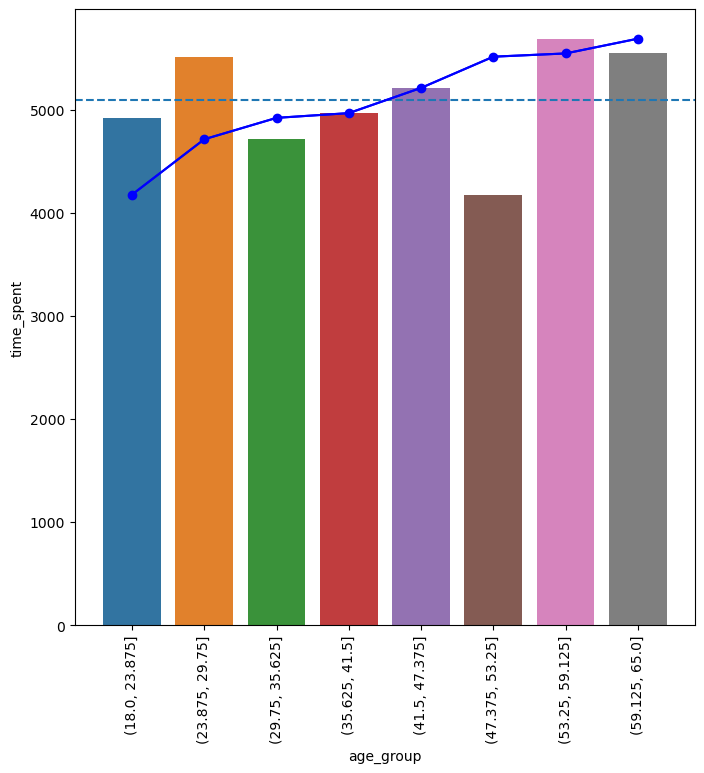

In [72]:
dfh = df1.groupby('age_group')['time_spent'].sum().reset_index()
dfh.sort_values('time_spent', axis=0, ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(data=dfh, x='age_group', y='time_spent')
plt.axhline(y=dfh['time_spent'].mean(), linestyle='--', label='Mean time_spent Volume')
plt.plot(range(len(dfh)), dfh['time_spent'], marker='o', linestyle='-', color='b', label='time_spent Trend')
plt.plot(range(len(dfh)), dfh['time_spent'], color='b')

age groups of 23-29 & 53-59 spend more time shopping

C:\Users\srika\AppData\Local\Temp\ipykernel_12708\3906737642.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


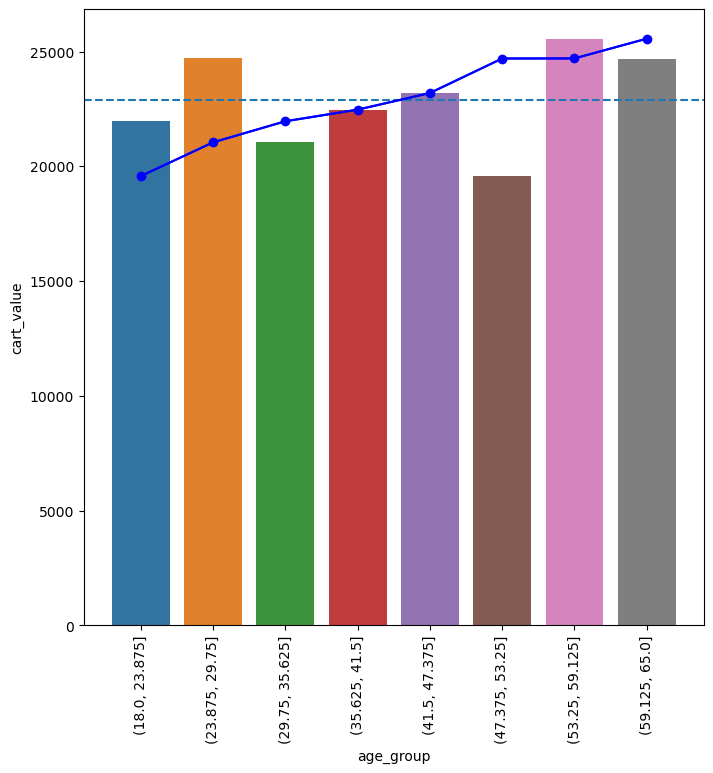

In [75]:
dfh = df1.groupby('age_group')['cart_value'].sum().reset_index()
dfh.sort_values('cart_value', axis=0, ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(data=dfh, x='age_group', y='cart_value')
plt.axhline(y=dfh['cart_value'].mean(), linestyle='--', label='Mean cart_value Volume')
plt.plot(range(len(dfh)), dfh['cart_value'], marker='o', linestyle='-', color='b', label='cart_value Trend')
plt.plot(range(len(dfh)), dfh['cart_value'], color='b')

cart value is also high in the same age groups

C:\Users\srika\AppData\Local\Temp\ipykernel_12708\782735350.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


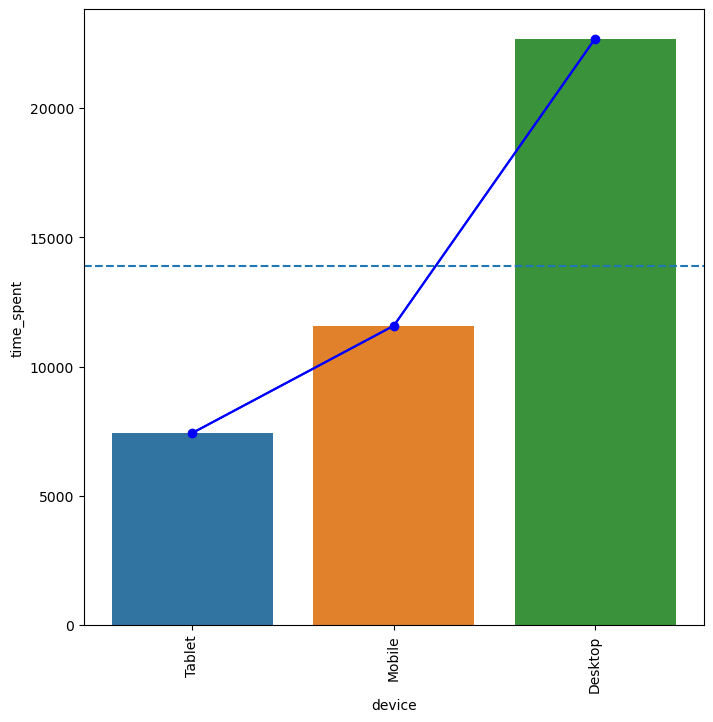

In [77]:
dfl = df1.groupby('device')['time_spent'].sum().reset_index()
dfl.sort_values('time_spent', axis=0, ascending=True, inplace=True)
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(data=dfl, x='device', y='time_spent')
plt.axhline(y=dfl['time_spent'].mean(), linestyle='--', label='Mean time_spent Volume')
plt.plot(range(len(dfl)), dfl['time_spent'], marker='o', linestyle='-', color='b', label='time_spent Trend')
plt.plot(range(len(dfl)), dfl['time_spent'], color='b')

more time is spent brousing though desktop than the rest

<Axes: ylabel='Revenue'>

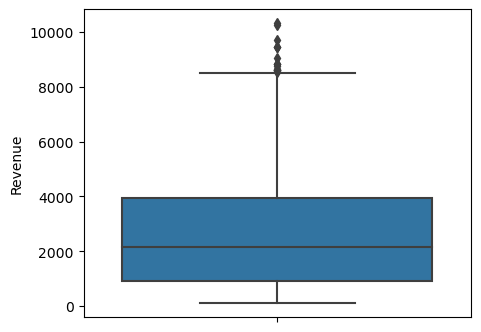

In [79]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.boxplot(data=df,y='Revenue',ax=ax)

most clients spend less money

---------------

Q1 .  Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not? <br>
 <br>
we are comparing users and the most import value of revenue generation in a company and come to the following conclusion:  <br>
1) location 5 & 2 have lower income <br>
2) high number of users on desktop than phones that generate income <br>
3) age groups of 23-29 & 53-59 have high usage <br>


Q2. How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices. <br>
 <br>
 <br>
1 - checked for missing values & duplicate values for dropping. total drop should be less than 10% <br>
        in our case we had them under 10% hence imputation wasn’t required. (imputation with mean or median or may be using linear regression) <br>
2 - once the data is free of missing values we clean the data to identify outliers. <br>
        in our data after plotting pairplot we found few outliers in time spent and we removed them. Although time spent is not normally distributed, we can still use the data for non-statistical purposes. <br>
3 - checking for date time conversion . we had no date & time values so skipped <br>


Q3. What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how). <br>
<br>
we are comparing users and the most import value of revenue generation in a company and come to the following conclusion: <br>
1) location 5 & 2 needs to be improved since they ate least revenue generating<br>
2) concentrate on better web design since most users are desktop based vs rest<br>
3) look at the age groups 23-29 & 53-59 for website designing as their personas <br>
4) improve retention rate since age group 29-35 are not converting their cart into useful revenue <br>
5) look in upshifting low cost products since we it has high revenue. shifting the product price range can also generate revenue <br>
 


